### LeBron James Shot Data EDA

In [2]:
import pandas as pd
import os

In [3]:
RAW_DATA_PATH = "../data/raw/lebron_shots_raw.csv"

In [4]:
if os.path.exists(RAW_DATA_PATH):
    df = pd.read_csv(RAW_DATA_PATH)
    print(f"Loaded {len(df):,} shots with {len(df.columns)} columns")
else:
    raise FileNotFoundError(f"{RAW_DATA_PATH} not found")

Loaded 36,780 shots with 26 columns


In [6]:
df.head()

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM,api_extraction_season,api_extraction_season_type
0,Shot Chart Detail,20300014,20,2544,LeBron James,1610612739,Cleveland Cavaliers,1,8,56,...,15.0,158.0,0.0,1,1,20031029,SAC,CLE,2003,Regular Season
1,Shot Chart Detail,20300014,28,2544,LeBron James,1610612739,Cleveland Cavaliers,1,7,44,...,13.0,-131.0,2.0,1,1,20031029,SAC,CLE,2003,Regular Season
2,Shot Chart Detail,20300014,35,2544,LeBron James,1610612739,Cleveland Cavaliers,1,7,1,...,16.0,163.0,5.0,1,1,20031029,SAC,CLE,2003,Regular Season
3,Shot Chart Detail,20300014,39,2544,LeBron James,1610612739,Cleveland Cavaliers,1,6,29,...,14.0,-118.0,92.0,1,0,20031029,SAC,CLE,2003,Regular Season
4,Shot Chart Detail,20300014,54,2544,LeBron James,1610612739,Cleveland Cavaliers,1,4,48,...,5.0,54.0,22.0,1,1,20031029,SAC,CLE,2003,Regular Season


In [7]:
# Missing values
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print("Columns with missing values:")
display(missing)

# Basic stats
df.describe()


Columns with missing values:


SHOT_ZONE_BASIC    2
SHOT_ZONE_AREA     2
SHOT_ZONE_RANGE    2
SHOT_DISTANCE      2
LOC_X              2
LOC_Y              2
dtype: int64

,GAME_ID,GAME_EVENT_ID,PLAYER_ID,TEAM_ID,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,api_extraction_season
count,3.678000e+04,36780.000000,36780.0,3.678000e+04,36780.000000,36780.000000,36780.000000,36778.000000,36778.000000,36778.000000,36780.0,36780.000000,3.678000e+04,36780.000000
mean,2.454280e+07,277.583632,2544.0,1.610613e+09,2.520038,5.088472,28.297635,11.736419,-10.234760,81.455626,1.0,0.504812,2.013618e+07,2012.883197
std,7.415945e+06,173.397450,0.0,4.201965e+00,1.151205,3.476544,17.572178,10.323867,102.196983,91.782022,0.0,0.499984,6.187929e+04,6.203142
min,2.030001e+07,1.000000,2544.0,1.610613e+09,1.000000,0.000000,0.000000,0.000000,-248.000000,-44.000000,1.0,0.000000,2.003103e+07,2003.000000
25%,2.080071e+07,120.000000,2544.0,1.610613e+09,1.000000,2.000000,13.000000,1.000000,-69.000000,6.000000,1.0,0.000000,2.008052e+07,2007.000000
50%,2.150026e+07,277.000000,2544.0,1.610613e+09,3.000000,5.000000,28.000000,11.000000,0.000000,35.000000,1.0,1.000000,2.013112e+07,2013.000000
75%,2.220066e+07,405.000000,2544.0,1.610613e+09,4.000000,8.000000,43.000000,22.000000,23.000000,157.000000,1.0,1.000000,2.018111e+07,2018.000000
max,4.240016e+07,833.000000,2544.0,1.610613e+09,7.000000,12.000000,59.000000,86.000000,250.000000,845.000000,1.0,1.000000,2.025123e+07,2025.000000


In [8]:
SHOT_TYPE_MAPPING = {
    '2PT Field Goal': '2PT',
    '3PT Field Goal': '3PT',
    'Free Throw': 'FT'
}

In [9]:
df['SHOT_TYPE_STD'] = df['SHOT_TYPE'].map(SHOT_TYPE_MAPPING)
unmapped = df[df['SHOT_TYPE_STD'].isnull()]['SHOT_TYPE'].unique()
if len(unmapped) > 0:
    print("Unmapped shot types:", unmapped)

In [10]:
# Classify distances
def classify_distance(distance):
    if distance <= 3:
        return 'At Rim'
    elif distance <= 10:
        return 'Mid Range'
    elif distance <= 23.75:
        return 'Three Point'
    else:
        return 'Beyond Arc'

df['DISTANCE_CLASS'] = df['SHOT_DISTANCE'].apply(classify_distance)

In [13]:
df['DISTANCE_CLASS'].unique()

array(['Three Point', 'Mid Range', 'At Rim', 'Beyond Arc'], dtype=object)

In [14]:
# Shots by season
shots_by_season = df['api_extraction_season'].value_counts().sort_index()
print("Shots by season:")
display(shots_by_season)

Shots by season:


api_extraction_season
2003    1492
2004    1684
2005    2130
2006    2020
2007    1917
2008    1925
2009    1739
2010    1858
2011    1671
2012    1786
2013    1693
2014    1823
2015    1833
2016    1728
2017    2090
2018    1095
2019    1685
2020     937
2021    1221
2022    1514
2023    1368
2024    1358
2025     213
Name: count, dtype: int64

In [15]:
# Shot type distribution
print("\nShot type distribution:")
display(df['SHOT_TYPE_STD'].value_counts())


Shot type distribution:


SHOT_TYPE_STD
2PT    27952
3PT     8828
Name: count, dtype: int64

In [17]:
# Made vs missed
print("\nShot outcome:")
display(df['SHOT_MADE_FLAG'].value_counts())


Shot outcome:


SHOT_MADE_FLAG
1    18567
0    18213
Name: count, dtype: int64

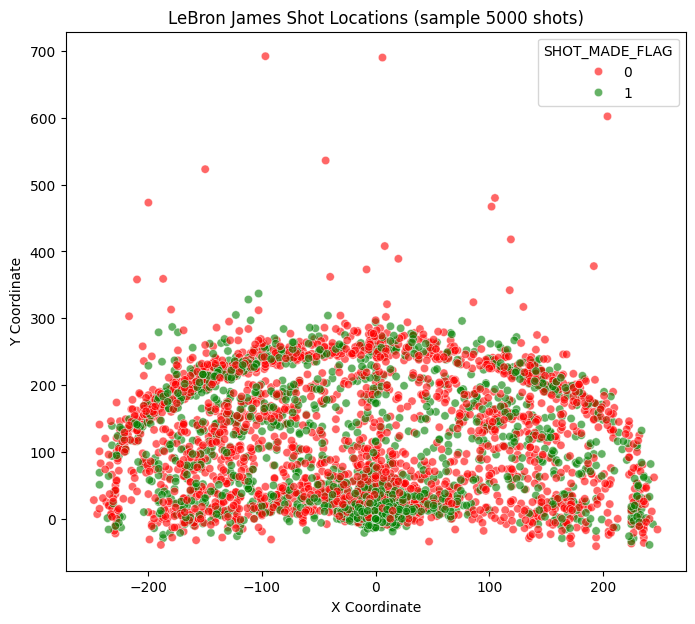

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 7))
sns.scatterplot(
    x='LOC_X', y='LOC_Y',
    hue='SHOT_MADE_FLAG',
    data=df.sample(5000),  # sample for faster plotting
    alpha=0.6,
    palette={0:'red', 1:'green'}
)
plt.title("LeBron James Shot Locations (sample 5000 shots)")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.show()


In [ ]:
season_to_plot = 2023
season_df = df[df['api_extraction_season'] == season_to_plot]

print(f"Shots in {season_to_plot}-{season_to_plot+1} season: {len(season_df)}")
display(season_df.head())


Shots in 2023-2024 season: 1368


,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM,api_extraction_season,api_extraction_season_type,SHOT_TYPE_STD,DISTANCE_CLASS
33841,Shot Chart Detail,22300015,7,2544,LeBron James,1610612747,Los Angeles Lakers,1,11,40,...,172.0,1,0,20231110,PHX,LAL,2023,Regular Season,2PT,Three Point
33842,Shot Chart Detail,22300015,11,2544,LeBron James,1610612747,Los Angeles Lakers,1,11,12,...,5.0,1,1,20231110,PHX,LAL,2023,Regular Season,2PT,At Rim
33843,Shot Chart Detail,22300015,20,2544,LeBron James,1610612747,Los Angeles Lakers,1,10,1,...,32.0,1,0,20231110,PHX,LAL,2023,Regular Season,2PT,Three Point
33844,Shot Chart Detail,22300015,36,2544,LeBron James,1610612747,Los Angeles Lakers,1,9,0,...,8.0,1,1,20231110,PHX,LAL,2023,Regular Season,2PT,At Rim
33845,Shot Chart Detail,22300015,72,2544,LeBron James,1610612747,Los Angeles Lakers,1,5,18,...,89.0,1,0,20231110,PHX,LAL,2023,Regular Season,2PT,Three Point


In [24]:
# Aggregate by season and shot type
season_summary = (
    df.groupby(['api_extraction_season', 'SHOT_TYPE_STD'])
      .agg(
          total_shots=('SHOT_MADE_FLAG', 'count'),
          made=('SHOT_MADE_FLAG', 'sum'),
          missed=('SHOT_MADE_FLAG', lambda x: (1 - x).sum())
      )
      .reset_index()
)

In [26]:
# Calculate percentage made
season_summary['pct_made'] = (season_summary['made'] / season_summary['total_shots'] * 100).round(1)

In [27]:
# Sort by season
season_summary = season_summary.sort_values(['api_extraction_season', 'SHOT_TYPE_STD'])

In [28]:
# Display the table
season_summary

,api_extraction_season,SHOT_TYPE_STD,total_shots,made,missed,pct_made
0,2003,2PT,1275,559,716,43.8
1,2003,3PT,217,63,154,29.0
2,2004,2PT,1376,687,689,49.9
3,2004,3PT,308,108,200,35.1
4,2005,2PT,1688,873,815,51.7
5,2005,3PT,442,148,294,33.5
6,2006,2PT,1635,818,817,50.0
7,2006,3PT,385,120,265,31.2
8,2007,2PT,1488,776,712,52.2
9,2007,3PT,429,131,298,30.5


c:\Users\Ashim\Desktop\Projects\lebron_shot_analysis\lbj\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Ashim\Desktop\Projects\lebron_shot_analysis\lbj\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


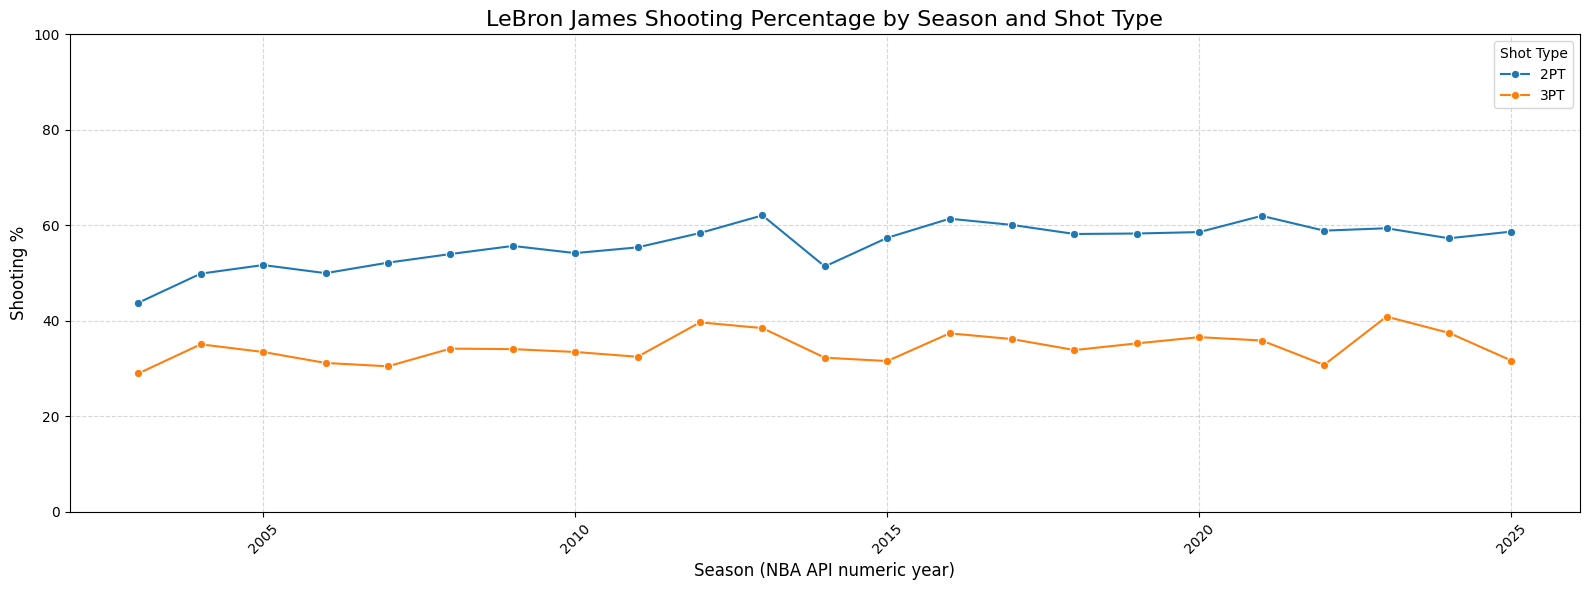

In [29]:
# Ensure the summary table exists
# season_summary: columns = ['api_extraction_season', 'SHOT_TYPE_STD', 'total_shots', 'made', 'missed', 'pct_made']

plt.figure(figsize=(16, 6))
sns.lineplot(
    data=season_summary,
    x='api_extraction_season',
    y='pct_made',
    hue='SHOT_TYPE_STD',
    marker='o'
)

plt.title("LeBron James Shooting Percentage by Season and Shot Type", fontsize=16)
plt.xlabel("Season (NBA API numeric year)", fontsize=12)
plt.ylabel("Shooting %", fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Shot Type')
plt.tight_layout()
plt.show()
